# EDA — Prédiction du Churn Client (désabonnement)– Projet Data Science
**Auteur :** MACHAY Fatima 

**Date :** 2025-10-06  

**Objectif :** Développer un pipeline complet de Machine Learning supervisé permettant de prédire le désabonnement des clients (churn) au sein d’une entreprise de télécommunications, dans le but de mieux cibler les actions de fidélisation et de réduire la perte de clientèle.
Parallèlement, analyser et explorer les données clients afin d’identifier les facteurs clés qui influencent le risque de désabonnement. 


In [ ]:
import pandas as pd 
data = pd.read_csv("../DATA/churn.csv")
data
data.head()


In [ ]:

data.info()

In [ ]:
data.describe()

In [ ]:
import numpy as np
data.isnull().sum()


In [ ]:
import numpy as np
data.duplicated().sum()

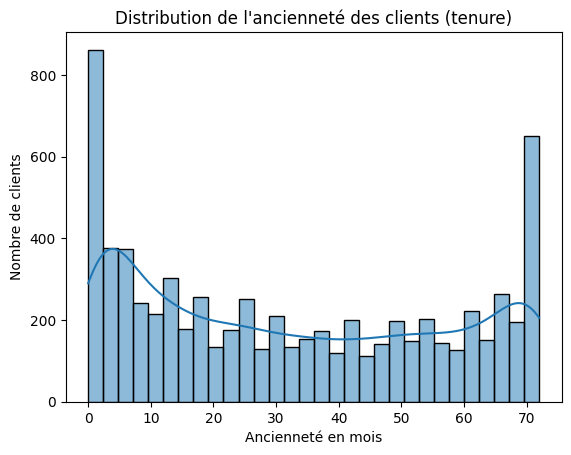

In [60]:
# Analyse univariée (par variable) :Étudier chaque variable individuellement:

import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(data['tenure'], kde=True, bins=30)
plt.title("Distribution de l'ancienneté des clients (tenure)")
plt.xlabel("Ancienneté en mois")
plt.ylabel("Nombre de clients")
plt.show()

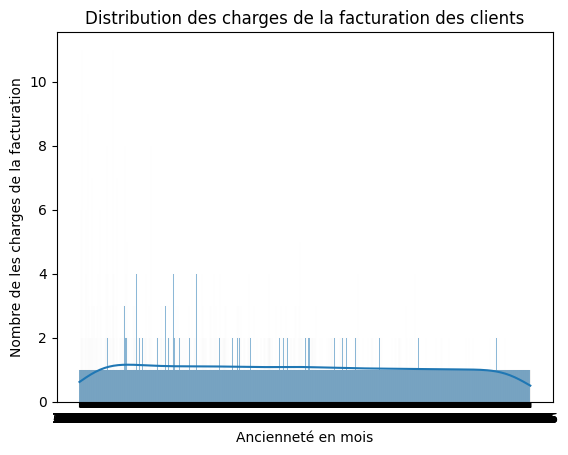

In [61]:
sns.histplot(data['TotalCharges'],kde=True, bins=10)
plt.title("Distribution des charges de la facturation des clients")
plt.xlabel("Ancienneté en mois")
plt.ylabel("Nombre de les charges de la facturation")
plt.show()